1. Is the website redesign any good?

H0 - The website redesign click rate did not increase.
Ha - The website redesign click rate increased.

True Negative - the evidence supports the click rate did not increase.

False Negative - the click rate did no increase but there was not enough to prove the negative was due to redesign.

False Positive - the click rate did increase but there was not enough to prove the positive was due to redesign .

True Positive - the evidence supports the click rate decreased.

2. Is our television ad driving sales?

H0 - Sales did not increase due to the ad.
Ha - Sales increased due to the ad

True Negative - The evidence shows the ad did not help sales.
False Negative - Sales did not increase but it may not be because of the ad.
False Positive - Sales increased but it may not be because of the ad.
True Positive - Sales increased and were proven to be related to the ad.

3. Has the network latency gone up since we switched internet service providers?

H0 - Network latency has not gone up since we switched services.

Ha - Network latency has gone up since we switched services

True Negative - Evidence shows no chance in latency
False Negative - no chance in latency, but evidence suggests it be affected by 
False Positive - Latency has gone up, but not strong evidence it is due to service change.
True Positive - Latency has gone up and it is very likely due to service chance.

In [23]:
# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.
from math import sqrt
from scipy import stats
n1 = 40
n2 = 50

s1 = 15
s2 = 20

m1 = 90
m2 = 100

degf = n1 + n2 - 2

s_p = sqrt((((n1-1) * s1**2) + ((n2-1) * s2**2))/(n1+n2-2))

standard_error = se = sqrt(s1**2 / n1 + s2**2/n2)
t = (m1-m2) /(s_p * sqrt(1/n1+1/n2))
t

-2.6252287036468456

In [26]:
from math import sqrt
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import viz # curriculum visualization examples

stats.t(degf).sf(t)*2

1.9897901475507607

In [28]:
from pydataset import data

In [34]:
mpg = data('mpg')
mpg.head(2)
mpg['mpg'] = (mpg['cty'] + mpg['hwy']) / 2
mpg.head(2)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0


In [42]:
mpg_by_year = mpg[['year','mpg']].groupby('year').mean()
mpg_by_year

,mpg
year,
1999,20.222222
2008,20.076923


In [49]:
mpg['type_compact'] = mpg['class'].str.contains('compact')
mpg_by_type = mpg[['type_compact','mpg']].groupby('type_compact').mean()
mpg_by_type

,mpg
type_compact,
False,17.947368
True,24.231707


In [50]:
mpg['manual_trans'] = mpg['trans'].str.contains('auto')
mpg_by_trans = mpg[['manual_trans','mpg']].groupby('manual_trans').mean()
mpg_by_trans

,mpg
manual_trans,
False,22.227273
True,19.130573


In [54]:
# Do VW get better highway mpg than average?

vw_highway_mpg = mpg[mpg.manufacturer == 'volkswagen'].hwy
vw_highway_mpg

stats.ttest_1samp(vw_highway_mpg,mpg.hwy.mean())

Ttest_1sampResult(statistic=5.652041311757083, pvalue=6.068818710469792e-06)

In [57]:
compact_mpg = mpg[mpg['class'] == 'compact'].cty

In [58]:
mid_mpg = mpg[mpg['class'] == 'midsize'].cty

In [59]:
stats.ttest_ind(mid_mpg,compact_mpg)

Ttest_indResult(statistic=-2.2845195147123536, pvalue=0.024803276085898066)

In [62]:
(274_136 + 977_643)/330_284_744

0.003789999455742346

In [65]:
mpg_hwy = mpg.hwy
mpg_cty = mpg.cty
mpg.head(1)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg,type,type_compact,manual_trans
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,True,True,True


In [64]:
stats.pearsonr(mpg_hwy,mpg_cty)

(0.9559159136495721, 1.8683071952629614e-125)

Is there a linear relationship between engine disp and cty?

Ho - there is no relationship between disp and cty
Ha - there is a relationship between disp and cty

mpg_disp = mpg.displ

In [67]:
mpg_disp = mpg.displ
stats.pearsonr(mpg_cty,mpg_disp)

(-0.7985239689348551, 4.737914890205637e-53)

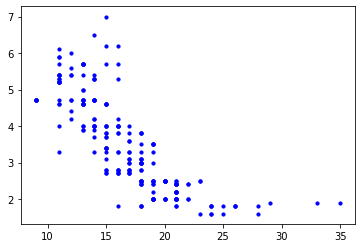

In [69]:
plt.scatter(mpg_cty,mpg_disp,s=10,c='blue')

In [124]:
import env
def get_db_url():
    user = env.user
    password = env.password
    host = env.host
    database = input("Database: ")
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [125]:
url = get_db_url()

Database: telco_churn


In [209]:
customers = pd.read_sql('''SELECT * FROM customers''',url)

In [212]:
customers = customers[customers['monthly_charges'].notnull()]

In [254]:
customers['monthly_charges','total_charges'] = customers['monthly_charges','total_charges'].astype(float)

x = customers['monthly_charges']
y = customers['tenure']

stats.pearsonr(x,y)

(0.2468617666408935, 3.9898213232673846e-98)

In [256]:
customers = customers[customers['total_charges'].notnull()]
#customers['total_charges'] = customers['total_charges'].astype(float)
x = customers['total_charges']
y = customers['tenure']
customers['total_charges'] = customers['total_charges'].convert_objects(convert_numeric=True)
#stats.pearsonr(x,y)
customers['total_charges'].sort_values()
stats.pearsonr(x,y)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """


(0.825880460933202, 0.0)

In [205]:
n = customers.shape[0]
degf = n-2
conf_interval = .95
alpha = 1-conf_interval

(0.052134674964232956, 1.2006106325920756e-05)

In [181]:
stringy = """    Company name
    leader: Claire
    cashier: Ole"""
def role(name):
    slice = stringy.partition(name)[0]
    role_str = slice.split(' ')[-2]
    return role_str

In [185]:
role('Ole')
from csv import reader
import pandas as pd
import scipy.stats as stats

In [190]:
df = pd.read_csv('kickstarter.csv')
df = df[df.status.isin(['failed','successful'])]
df['success'] = df.status == 'successfull'

In [192]:
pd.crosstab(df.status,df.category)

category,Art,Comics,Dance,Design,Fashion,Film & Video,Film &amp; Video,Food,Games,Music,Photography,Publishing,Technology,Theater
status,,,,,,,,,,,,,,
failed,1585,448,180,837,684,210,5962,643,832,3261,742,2484,448,680
successful,2106,520,527,729,335,246,6177,655,635,6792,645,1671,289,1642


In [262]:
url = get_db_url()
import pandas as pd

Database: employees


In [268]:
employees = pd.read_sql(
    """SELECT * FROM employees

    """,url)


In [284]:
salaries = pd.read_sql("""SELECT * FROM salaries""",url)


In [283]:
#salaries = salaries.groupby('emp_no').idxmax()


KeyError: 'emp_no'

In [274]:
employees = pd.merge(employees,salaries,on='emp_no')


In [275]:
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25
5,10001,1953-09-02,Georgi,Facello,M,1986-06-26,71046,1991-06-25,1992-06-24
6,10001,1953-09-02,Georgi,Facello,M,1986-06-26,74333,1992-06-24,1993-06-24
7,10001,1953-09-02,Georgi,Facello,M,1986-06-26,75286,1993-06-24,1994-06-24
8,10001,1953-09-02,Georgi,Facello,M,1986-06-26,75994,1994-06-24,1995-06-24
9,10001,1953-09-02,Georgi,Facello,M,1986-06-26,76884,1995-06-24,1996-06-23
